In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv('Master_DB.csv')

In [3]:
import numpy as np

# Calculate the percentile thresholds
low_threshold = np.percentile(data['popularity'], 25)
high_threshold = np.percentile(data['popularity'], 75)

# Create the 'popularity_class' column based on conditions
data['popularity_class'] = np.select(
    [
        data['popularity'] <= low_threshold,              # Low popularity (0)
        (data['popularity'] > low_threshold) & (data['popularity'] <= high_threshold),  # Neutral (1)
        data['popularity'] > high_threshold               # High popularity (2)
    ],
    [0, 1, 2]  # Assign corresponding class values
)

# Check the distribution of the new column
print(data['popularity_class'].value_counts())

popularity_class
1    68914
0    35808
2    34711
Name: count, dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'artist_name' column
data['artist_encoded'] = label_encoder.fit_transform(data['artist_name'])

In [5]:
label_encoder_genre = LabelEncoder()

# Fit and transform the 'genre' column
data['genre_encoded'] = label_encoder_genre.fit_transform(data['genre'])

In [6]:
selected_features = [
    'lyric_page_counter', 'word_count', 'num_parts', 'year_y', 
    'artist_encoded', 'genre_encoded', 
    'positive_sentiment', 'negative_sentiment', 'neutral_sentiment'
]

# Splitting features and target
X = data[selected_features]
y = data['popularity_class']

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Clustering

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the KNN model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.4f}')

# Print classification report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.6419
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      7199
           1       0.63      0.69      0.66     13700
           2       0.68      0.58      0.62      6988

    accuracy                           0.64     27887
   macro avg       0.65      0.63      0.63     27887
weighted avg       0.64      0.64      0.64     27887



# Logistic Regresssion 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Fit the model
logistic_regression.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logistic_regression.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg:.4f}')
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.6699
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      7199
           1       0.64      0.76      0.70     13700
           2       0.72      0.59      0.65      6988

    accuracy                           0.67     27887
   macro avg       0.69      0.64      0.66     27887
weighted avg       0.68      0.67      0.67     27887



# XG BOOST 

In [12]:

import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Initialize the XGBoost model
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fit the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7428
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      7199
           1       0.72      0.80      0.75     13700
           2       0.78      0.66      0.72      6988

    accuracy                           0.74     27887
   macro avg       0.76      0.73      0.74     27887
weighted avg       0.75      0.74      0.74     27887



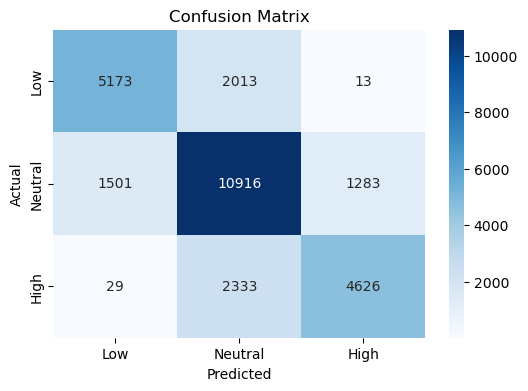

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Visualize confusion matrix with heatmap
plt.figure(figsize= (6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Neutral", "High"], yticklabels=["Low", "Neutral", "High"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Multi layer perceptron

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score



In [16]:
mlp2 = MLPClassifier(max_iter=1000, learning_rate_init=0.001)

In [17]:
mlp2.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [18]:
# Make predictions
y_pred_mlp = mlp2.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'MLP Accuracy: {accuracy_mlp:.4f}')
print(classification_report(y_test, y_pred_mlp))

MLP Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      7199
           1       0.67      0.74      0.70     13700
           2       0.74      0.61      0.67      6988

    accuracy                           0.69     27887
   macro avg       0.70      0.67      0.68     27887
weighted avg       0.69      0.69      0.69     27887



# SVM

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [41]:
# Initialize the SVM model with RBF kernel
svm_classifier = SVC(kernel='linear', random_state=42)

In [43]:
# Fit the model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [45]:
# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

In [47]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.4f}')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6693
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      7199
           1       0.64      0.77      0.70     13700
           2       0.73      0.58      0.64      6988

    accuracy                           0.67     27887
   macro avg       0.69      0.64      0.66     27887
weighted avg       0.68      0.67      0.67     27887

